<a href="https://colab.research.google.com/github/harsh-vt/transfer_learning/blob/master/transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
train_data = pd.read_csv('training_data.csv')

In [ ]:
train_data.head()

,A,B,C,D,E,F,G,H,I,J,K,L,S,T,U,V,W,X,Y,Z,AA,AB,AC,AD,AE,AF,AG,AH,AI,AK,AL,AM,AN,AO,AP,AQ,AR,AS,AT,AU,...,BD,BE,BF,BG,BH,BI,BJ,BK,BL,BM,BN,BO,BP,BQ,BR,BS,BT,BU,BV,BW,BX,BY,BZ,CA,CB,CC,CD,CE,CF,CG,CH,CI,CJ,CK,CL,CM,CN,CO,CP,CQ
0,0,1,0,0,0,0,1,0,0,0,0,2,0,24,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,1,0,0,0,0,0,0,0,0,420,0.0,7,35,0,200,1
1,0,1,0,0,0,0,1,0,0,0,0,2,0,24,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,0,0,0,1,0,0,0,0,0,40,0.0,11,5,0,20,1
2,0,1,0,0,0,0,1,0,0,0,0,2,0,24,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,1,0,0,0,0,0,0,0,0,40,0.0,12,5,0,305,1
3,0,1,0,0,0,0,1,0,0,0,0,2,0,24,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,1,0,0,0,0,0,0,0,0,420,0.0,17,35,0,110,1
4,0,1,0,0,0,0,1,0,0,0,0,2,0,24,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,3,1,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,6,0,0,0,0,0,1,0,0,0,85,0.0,19,20,0,75,5


In [ ]:
import numpy as np

In [ ]:
xy = np.array(train_data)

In [ ]:
print(xy)

[[  0.   1.   0. ...   0. 200.   1.]
 [  0.   1.   0. ...   0.  20.   1.]
 [  0.   1.   0. ...   0. 305.   1.]
 ...
 [  1.   0.   0. ...   0.  13.   4.]
 [  1.   0.   0. ...   0.   0.   4.]
 [  0.   0.   1. ...   0.   0.   2.]]


In [ ]:
np.random.shuffle(xy)

In [ ]:
y = xy[:, -1:]
x = xy[:, 0:-1]
print(y)
print(x)

[[5.]
 [1.]
 [5.]
 ...
 [5.]
 [5.]
 [5.]]
[[  0.   1.   0. ...  15.   0.  35.]
 [  0.   0.   1. ...  30.   0. 540.]
 [  0.   1.   0. ...  21.   0. 524.]
 ...
 [  0.   1.   0. ...  15.   0. 105.]
 [  0.   0.   1. ...  30.   0. 300.]
 [  0.   0.   1. ...  10.   0.  45.]]


In [ ]:
x=x/x.max(axis=0)

In [ ]:
k = 3500
l = 100
x_train = x[0:k,:]
y_train = y[0:k,:]
x_val = x[k:k+l,:]
y_val = y[k:k+l,:]
x_test = x[k+l:,:]
y_test = y[k+l:,:]

In [ ]:
print(x_train.shape)
# print(x_train)
print()
print(y_train.shape)
# print(y_train)
print()
print(x_val.shape)
# print(x_val)
print()
print(y_val.shape)
# print(y_val)
print()
print(x_test.shape)
# print(x_test)
print()
print(y_test.shape)
# print(y_test)

(3500, 87)

(3500, 1)

(100, 87)

(100, 1)

(68, 87)

(68, 1)


In [ ]:
def baseline_model():

  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(87, input_dim=input_shape, activation='sigmoid'))
  model.add(tf.keras.layers.Dropout(0.1))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dense(124, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.1))
  model.add(tf.keras.layers.BatchNormalization())
  model.add(tf.keras.layers.Dense(7,activation='softmax'))
  model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

Epoch 1/200
 98/110 [=========================>....] - ETA: 0s - loss: 1.7131 - accuracy: 0.3989
Epoch 00001: saving model to training_1/cp.ckpt
110/110 [==============================] - 0s 4ms/step - loss: 1.7007 - accuracy: 0.4009 - val_loss: 1.2698 - val_accuracy: 0.5400
Epoch 2/200
102/110 [==========================>...] - ETA: 0s - loss: 1.3236 - accuracy: 0.5138
Epoch 00002: saving model to training_1/cp.ckpt
110/110 [==============================] - 0s 3ms/step - loss: 1.3198 - accuracy: 0.5117 - val_loss: 1.1153 - val_accuracy: 0.5700
Epoch 3/200
 94/110 [========================>.....] - ETA: 0s - loss: 1.2062 - accuracy: 0.5429
Epoch 00003: saving model to training_1/cp.ckpt
110/110 [==============================] - 0s 3ms/step - loss: 1.1944 - accuracy: 0.5454 - val_loss: 1.0104 - val_accuracy: 0.6400
Epoch 4/200
 93/110 [========================>.....] - ETA: 0s - loss: 1.1019 - accuracy: 0.5813
Epoch 00004: saving model to training_1/cp.ckpt
110/110 [==================

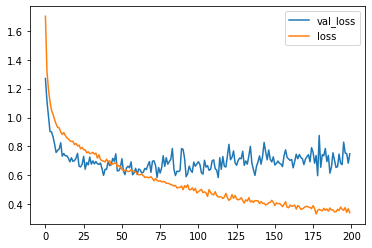

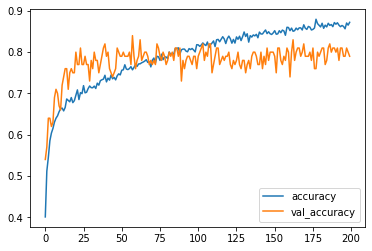

87


In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import os

input_shape = x_train.shape[1]

model = baseline_model()

checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

hist = model.fit(x_train, y_train, epochs=200,  validation_data=(x_val, y_val), callbacks=[cp_callback])
plt.plot(hist.history['val_loss'])
plt.show
plt.plot(hist.history['loss'])
plt.legend(["val_loss", "loss"], loc ="best") 
plt.show()

plt.plot(hist.history['accuracy'])
plt.show
plt.plot(hist.history['val_accuracy'])
plt.legend(["accuracy", "val_accuracy"], loc ="best") 
plt.show()
print(input_shape)

In [ ]:
predicted = model.evaluate(x_test,y_test) 

115/115 [==============================] - 0s 1ms/step - loss: 0.1819 - accuracy: 0.9471


In [ ]:
model.summary()

Model: "sequential_116"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_381 (Dense)            (None, 87)                7656      
_________________________________________________________________
dropout_65 (Dropout)         (None, 87)                0         
_________________________________________________________________
batch_normalization_225 (Bat (None, 87)                348       
_________________________________________________________________
dense_382 (Dense)            (None, 124)               10912     
_________________________________________________________________
dropout_66 (Dropout)         (None, 124)               0         
_________________________________________________________________
batch_normalization_226 (Bat (None, 124)               496       
_________________________________________________________________
dense_383 (Dense)            (None, 7)              

In [ ]:
export_path = os.path.abspath(os.getcwd())+'/models/saved_model'
model.save(export_path, save_format='tf')
export_path

INFO:tensorflow:Assets written to: /content/models/saved_model/assets


'/content/models/saved_model'

In [ ]:
test_data = pd.read_csv('testing_data.csv')
ab = np.array(train_data)
b = ab[:, -1:]
a = ab[:, 0:-1]
a = a/a.max(axis=0)
print(a.shape)
print(a)
print()
print(b.shape)
print(b)

(3668, 87)
[[0.         1.         0.         ... 0.04481434 0.         0.19512195]
 [0.         1.         0.         ... 0.00640205 0.         0.0195122 ]
 [0.         1.         0.         ... 0.00640205 0.         0.29756098]
 ...
 [1.         0.         0.         ... 0.00256082 0.         0.01268293]
 [1.         0.         0.         ... 0.00256082 0.         0.        ]
 [0.         0.         1.         ... 1.         0.         0.        ]]

(3668, 1)
[[1.]
 [1.]
 [1.]
 ...
 [4.]
 [4.]
 [2.]]


In [ ]:
import_path = os.path.abspath(os.getcwd())+'/models/saved_model'
reloaded_model = tf.keras.models.load_model(import_path)
reloaded_model.summary()
reloaded_model.load_weights(checkpoint_path)

Model: "sequential_116"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_381 (Dense)            (None, 87)                7656      
_________________________________________________________________
dropout_65 (Dropout)         (None, 87)                0         
_________________________________________________________________
batch_normalization_225 (Bat (None, 87)                348       
_________________________________________________________________
dense_382 (Dense)            (None, 124)               10912     
_________________________________________________________________
dropout_66 (Dropout)         (None, 124)               0         
_________________________________________________________________
batch_normalization_226 (Bat (None, 124)               496       
_________________________________________________________________
dense_383 (Dense)            (None, 7)              

In [ ]:
prediction_model_eval = model.evaluate(a, b) 
reloaded_model_eval = reloaded_model.evaluate(a, b)

115/115 [==============================] - 0s 1ms/step - loss: 15.5593 - accuracy: 0.2615


[15.559329986572266, 0.2614503800868988]